In [1]:
import cProfile

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.stats as st

import neuro_op as nop

In [2]:
input = dict(
    G=nop.build_random_network(N_nodes=100, N_neighbours=5),
    llf_nodes=st.norm,
    mu_arr=np.linspace(-10, 10, 201),
    log_priors=np.zeros(201),
    sd_prior=10,
    sd_llf_nodes=1,
    llf_world=st.norm,
    mu_world=0,
    sd_world=1,
    h=1,
    r=0,
    t0=0,
    t_max=50,
    t_sample=1,
    sample_range=(-10, 10),
    sample_bins=201,
    sampling=True,
)

In [3]:
# cProfile.run("nop.run_Grid(**input)")

In [4]:
out1 = nop.run_GridMu(**input)

print(out1["N_events"])

5074


In [5]:
nop.export_hdf5(out1, "test.h5")
out_1 = nop.import_hdf5("test.h5")

## Data analysis

Random data analysis test notebook of steps later used in thorough analysis.


In [6]:
# For improving of readability, increase all font sizes of plots. Also, set legend location to upper right.
plt.rcParams.update(
    {
        "font.size": 20,
        "legend.loc": "upper right",
    }
)

#### Data analysis 1

Firstly, extract output values for further analysis:

In [7]:
for i in out1.keys():
    print(i)

nodesGridMu
world
G
N_events
t_end
t_start
t_exec
seed
mu_arr
mu_nodes
kl_divs



Each node's posteriors are plotted. One should see nodes' posteriors of model parameters (in this case, $\mu$), to converge around the true value. If not, nodes may need more information to converge ($\rightarrow$ increase $t_{max}, h$).


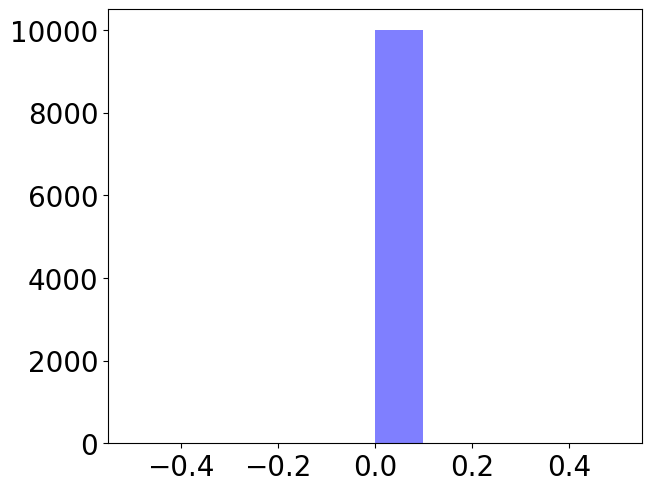

In [8]:
mu = np.array(out1["mu_nodes"])
mu_tmp = mu[0]


def pairwise_hist(stances):
    distances = abs(stances - stances[:, None])
    fig, ax = plt.subplots(1, 1, constrained_layout=True)
    ax.hist(
        distances.flatten(),
        bins=int(np.ceil(2 * len(stances) ** (1 / 3))),
        alpha=0.5,
        color="b",
    )

    return fig, ax


fig, ax = pairwise_hist(mu_tmp)

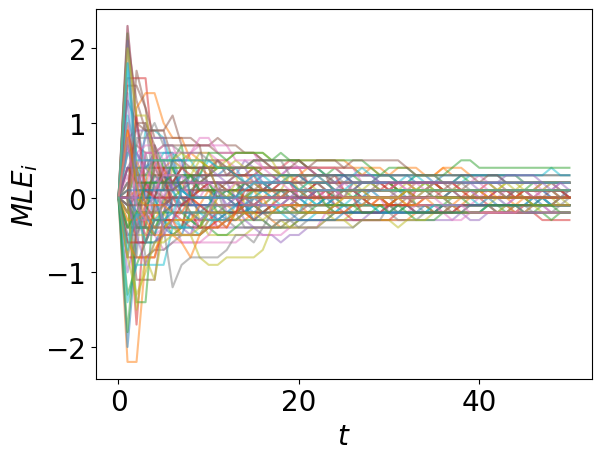

In [9]:
mu_arr = np.array(out1["mu_nodes"])
x = np.arange(mu_arr.shape[0]) * input["t_sample"]
for i, _ in enumerate(mu_arr.T):
    plt.plot(x, mu_arr.T[i], alpha=0.5, label=f"Node {i}")
    plt.xlabel("$t$")
    plt.ylabel("$MLE_i$")
# plt.ylim(-5, 5)

#### Data analysis 2

In [10]:
N_iter = range(input["G"].number_of_nodes())
kld = np.array(out1["kl_divs"])
kld.shape

(51, 100)

[]

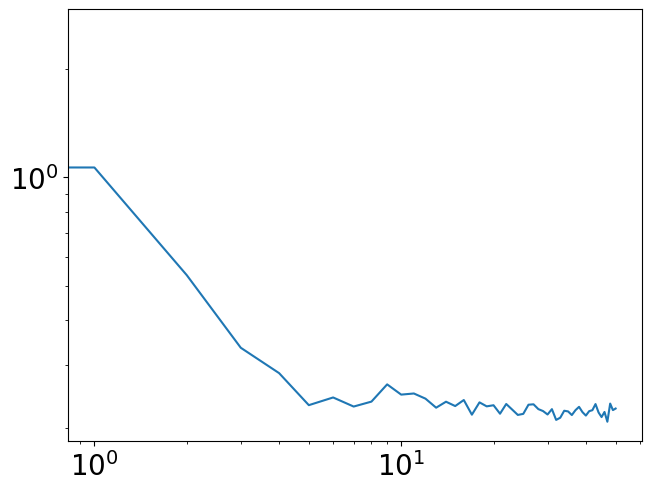

In [11]:
i = 1
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(
    # input["t_sample"] * np.arange(0, kld.shape[0]),
    kld.mean(axis=i),
    label="avg",
)
ax.loglog()
# ax.set_yscale("log")